# Interpolate irregularly spaced data onto a regular grid
http://stackoverflow.com/questions/3864899/resampling-irregularly-spaced-data-to-a-regular-grid-in-python

Install natgrid (matplotlib-toolkit extension) with
```
[First download natgrid-0.2.1.tar.gz from sourceforge
cd natgrid-0.2.1
/Users/leaf/.virtualenvs/roofduino/bin/python setup.py install
```

## Stackoverflow example

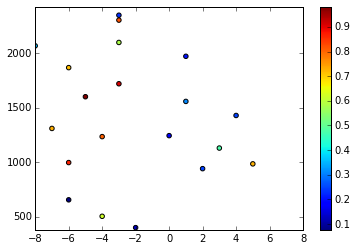

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

# Bounds and number of the randomly generated data points
ndata = 20
xmin, xmax = -8, 8
ymin, ymax = 380, 2428

# Generate random data
x = np.random.randint(xmin, xmax, ndata)
y = np.random.randint(ymin, ymax, ndata)
z = np.random.random(ndata)

# Plot the random data points
plt.scatter(x,y,c=z)
plt.axis([xmin, xmax, ymin, ymax])
plt.colorbar()
plt.show()

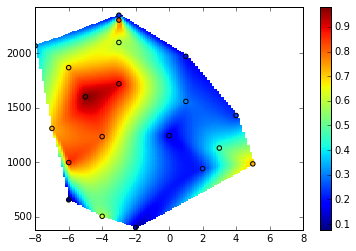

In [11]:
# Size of regular grid
ny, nx = 512, 115

# Generate a regular grid to interpolate the data.
xi = np.linspace(xmin, xmax, nx)
yi = np.linspace(ymin, ymax, ny)
xi, yi = np.meshgrid(xi, yi)

# Interpolate using delaunay triangularization 
zi = mlab.griddata(x,y,z,xi,yi)

# Plot the results
plt.figure()
plt.pcolormesh(xi,yi,zi)
plt.scatter(x,y,c=z)
plt.colorbar()
plt.axis([xmin, xmax, ymin, ymax])
plt.show()

natgrid add on for matplotlib

python -m pip install .\natgrid-0.2.1-cp27-none-win_amd64.whl

In [7]:
help(mlab.griddata)

Help on function griddata in module matplotlib.mlab:

griddata(x, y, z, xi, yi, interp=u'nn')
    Interpolates from a nonuniformly spaced grid to some other
    grid.
    
    Fits a surface of the form z = f(`x`, `y`) to the data in the
    (usually) nonuniformly spaced vectors (`x`, `y`, `z`), then
    interpolates this surface at the points specified by
    (`xi`, `yi`) to produce `zi`.
    
    Parameters
    ----------
    x, y, z : 1d array_like
        Coordinates of grid points to interpolate from.
    xi, yi : 1d or 2d array_like
        Coordinates of grid points to interpolate to.
    interp : string key from {'nn', 'linear'}
        Interpolation algorithm, either 'nn' for natural neighbor, or
        'linear' for linear interpolation.
    
    Returns
    -------
    2d float array
        Array of values interpolated at (`xi`, `yi`) points.  Array
        will be masked is any of (`xi`, `yi`) are outside the convex
        hull of (`x`, `y`).
    
    Notes
    -----
    

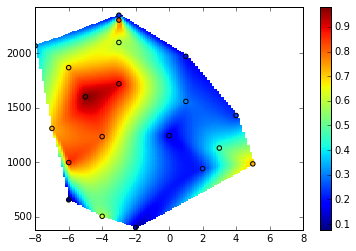

In [12]:
# (Continued from examples above...)
# Normalize coordinate system
def normalize_x(data):
    data = data.astype(np.float)
    return (data - xmin) / (xmax - xmin)

def normalize_y(data):
    data = data.astype(np.float)
    return (data - ymin) / (ymax - ymin)

x_new, xi_new = normalize_x(x), normalize_x(xi)
y_new, yi_new = normalize_y(y), normalize_y(yi)

# Interpolate using delaunay triangularization 
zi = mlab.griddata(x_new, y_new, z, xi_new, yi_new)

# Plot the results
plt.figure()
plt.pcolormesh(xi,yi,zi)
plt.scatter(x,y,c=z)
plt.colorbar()
plt.axis([xmin, xmax, ymin, ymax])
plt.show()

## My example